## 1. Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Importando nossos dados

In [2]:
arq=pd.read_excel(r"C:\Users\Andrey\Downloads\Portifólio\Risco_crdito_completo\risco_credito_alemanha_completo.xlsx")
arq

,Status da conta corrente existente,Duração,Histórico de crédito,Propósito,Valor do crédito,Conta poupança/títulos,Emprego atual desde,Taxa de parcelamento em porcentagem da renda disponível,Status pessoal e sexo,Outros devedores,...,Propriedade,Idade,Outros planos de parcelamento,Habitação,Número de créditos existentes neste banco,Trabalho,Número de pessoas por fornecer manutenção,Telephone,trabalhador estrangeiro,default
0,< 0 DM,6,conta crítica/ outros créditos existentes (não...,rádio/televisão,1169,desconhecido/nenhuma conta poupança,.. >= 7 years,4,masculino: solteiro,nenhum,...,imobiliária,67,nenhum,própria,2,funcionário qualificado,1,"sim, registrado em nome do cliente",sim,1
1,0 <= ... < 200 DM,48,créditos existentes devidamente pagos até agora,rádio/televisão,5951,... < 100 DM,1 <= ... < 4 years,2,feminino: divorciado/separado/casado,nenhum,...,imobiliária,22,nenhum,própria,1,funcionário qualificado,1,nenhum,sim,2
2,sem conta corrente,12,conta crítica/ outros créditos existentes (não...,educação,2096,... < 100 DM,4 <= ... < 7 years,2,masculino: solteiro,nenhum,...,imobiliária,49,nenhum,própria,1,não qualificado - residente,2,nenhum,sim,1
3,< 0 DM,42,créditos existentes devidamente pagos até agora,móveis/equipamentos,7882,... < 100 DM,4 <= ... < 7 years,2,masculino: solteiro,fiadora,...,acordo de poupança para sociedade de crédito i...,45,nenhum,de graça,1,funcionário qualificado,2,nenhum,sim,1
4,< 0 DM,24,atraso no pagamento no passado,carro (novo),4870,... < 100 DM,1 <= ... < 4 years,3,masculino: solteiro,nenhum,...,desconhecido/sem propriedade,53,nenhum,de graça,2,funcionário qualificado,2,nenhum,sim,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sem conta corrente,12,créditos existentes devidamente pagos até agora,móveis/equipamentos,1736,... < 100 DM,4 <= ... < 7 years,3,feminino: divorciado/separado/casado,nenhum,...,imobiliária,31,nenhum,própria,1,não qualificado - residente,1,nenhum,sim,1
996,< 0 DM,30,créditos existentes devidamente pagos até agora,carro (usado),3857,... < 100 DM,1 <= ... < 4 years,4,masculino: divorciado/separado,nenhum,...,acordo de poupança para sociedade de crédito i...,40,nenhum,própria,1,altamente qualificado,1,"sim, registrado em nome do cliente",sim,1
997,sem conta corrente,12,créditos existentes devidamente pagos até agora,rádio/televisão,804,... < 100 DM,.. >= 7 years,4,masculino: solteiro,nenhum,...,"carro ou outro, não no atributo",38,nenhum,própria,1,funcionário qualificado,1,nenhum,sim,1
998,< 0 DM,45,créditos existentes devidamente pagos até agora,rádio/televisão,1845,... < 100 DM,1 <= ... < 4 years,4,masculino: solteiro,nenhum,...,desconhecido/sem propriedade,23,nenhum,de graça,1,funcionário qualificado,1,"sim, registrado em nome do cliente",sim,2


In [3]:
#Caso queira saber um pouco mais sobre cada dado
arq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Status da conta corrente existente                       1000 non-null   object
 1   Duração                                                  1000 non-null   int64 
 2   Histórico de crédito                                     1000 non-null   object
 3   Propósito                                                1000 non-null   object
 4   Valor do crédito                                         1000 non-null   int64 
 5   Conta poupança/títulos                                   1000 non-null   object
 6   Emprego atual desde                                      1000 non-null   object
 7   Taxa de parcelamento em porcentagem da renda disponível  1000 non-null   int64 
 8   Status pessoal e sexo                  

## 3. Limpeza e tratamento de dados

In [4]:
#vendo se temos strings vazias nas colunas
arq.isna().sum()

Status da conta corrente existente                         0
Duração                                                    0
Histórico de crédito                                       0
Propósito                                                  0
Valor do crédito                                           0
Conta poupança/títulos                                     0
Emprego atual desde                                        0
Taxa de parcelamento em porcentagem da renda disponível    0
Status pessoal e sexo                                      0
Outros devedores                                           0
Residência atual desde                                     0
Propriedade                                                0
Idade                                                      0
Outros planos de parcelamento                              0
Habitação                                                  0
Número de créditos existentes neste banco                  0
Trabalho                

In [5]:
#Analisando se temos valores duplicados
arq.duplicated().sum()

0

In [6]:
#Analisando se temos outliers
arq.describe().round(1)

,Duração,Valor do crédito,Taxa de parcelamento em porcentagem da renda disponível,Residência atual desde,Idade,Número de créditos existentes neste banco,Número de pessoas por fornecer manutenção,default
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,20.9,3271.3,3.0,2.8,35.5,1.4,1.2,1.3
std,12.1,2822.7,1.1,1.1,11.4,0.6,0.4,0.5
min,4.0,250.0,1.0,1.0,19.0,1.0,1.0,1.0
25%,12.0,1365.5,2.0,2.0,27.0,1.0,1.0,1.0
50%,18.0,2319.5,3.0,3.0,33.0,1.0,1.0,1.0
75%,24.0,3972.2,4.0,4.0,42.0,2.0,1.0,2.0
max,72.0,18424.0,4.0,4.0,75.0,4.0,2.0,2.0


In [7]:
#trocando o nome de algumas colunas
arq.rename(columns={'Status da conta corrente existente': 'Conta corrente', 'Conta poupança/títulos': 'Conta poupança'}, inplace=True)

# 4. Análise exploratória

## 4.1 Análise do principais própositos para os clientes quererem crédito

In [8]:
#vendo a média que temos do Valor de credito em cada propósito
arq.groupby('Propósito')['Valor do crédito'].mean().round(1)

Propósito
carro (novo)           3063.0
carro (usado)          5666.5
educação               3180.4
eletrodomésticos       1498.0
móveis/equipamentos    3067.0
negócios               4158.0
reciclagem             1205.9
reparos                2728.1
rádio/televisão        2487.7
Name: Valor do crédito, dtype: float64

In [9]:
#trocando esse titulo de valor credito para media valor credito
media_credito=(arq.groupby('Propósito')['Valor do crédito'].mean().round(1).reset_index().rename(columns={'Valor do crédito':'média valor crédito'}))
media_credito

,Propósito,média valor crédito
0,carro (novo),3063.0
1,carro (usado),5666.5
2,educação,3180.4
3,eletrodomésticos,1498.0
4,móveis/equipamentos,3067.0
5,negócios,4158.0
6,reciclagem,1205.9
7,reparos,2728.1
8,rádio/televisão,2487.7


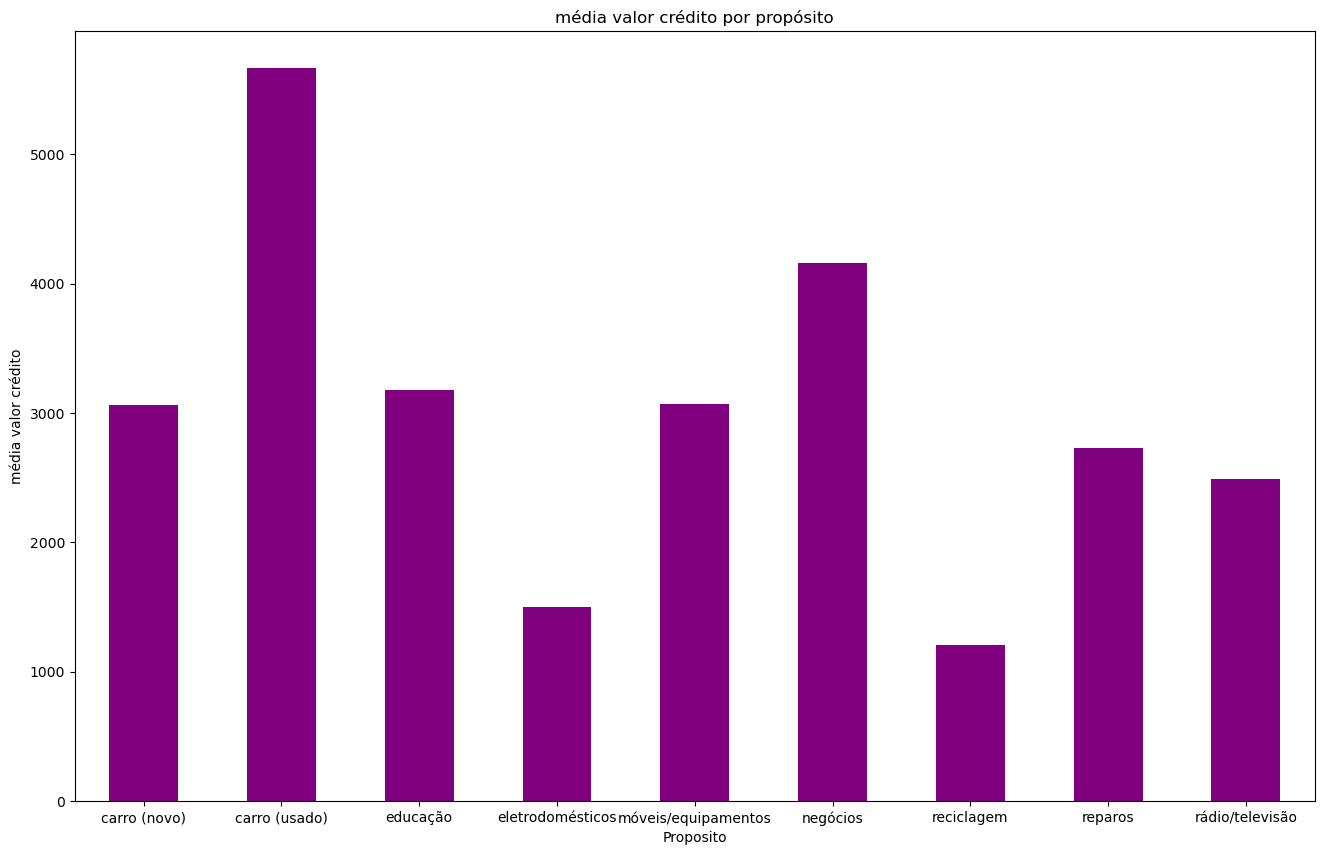

In [10]:
#Para uma visão gráfica
media_credito.set_index('Propósito').plot(kind='bar', figsize=(16, 10), color='purple', legend=False)
plt.title('média valor crédito por propósito')
plt.xlabel('Proposito')
plt.ylabel('média valor crédito')
plt.xticks(rotation=0)
plt.show()

In [11]:
#Caso não quisessemos ver a média, poderiamos ver a somas do crédito 
soma_credito=(arq.groupby('Propósito')['Valor do crédito'].sum().round(1).reset_index().rename(columns={'valor do crédito':'valor crédito'}))
soma_credito

,Propósito,Valor do crédito
0,carro (novo),716748
1,carro (usado),651645
2,educação,159020
3,eletrodomésticos,17976
4,móveis/equipamentos,555125
5,negócios,403330
6,reciclagem,10853
7,reparos,60018
8,rádio/televisão,696543


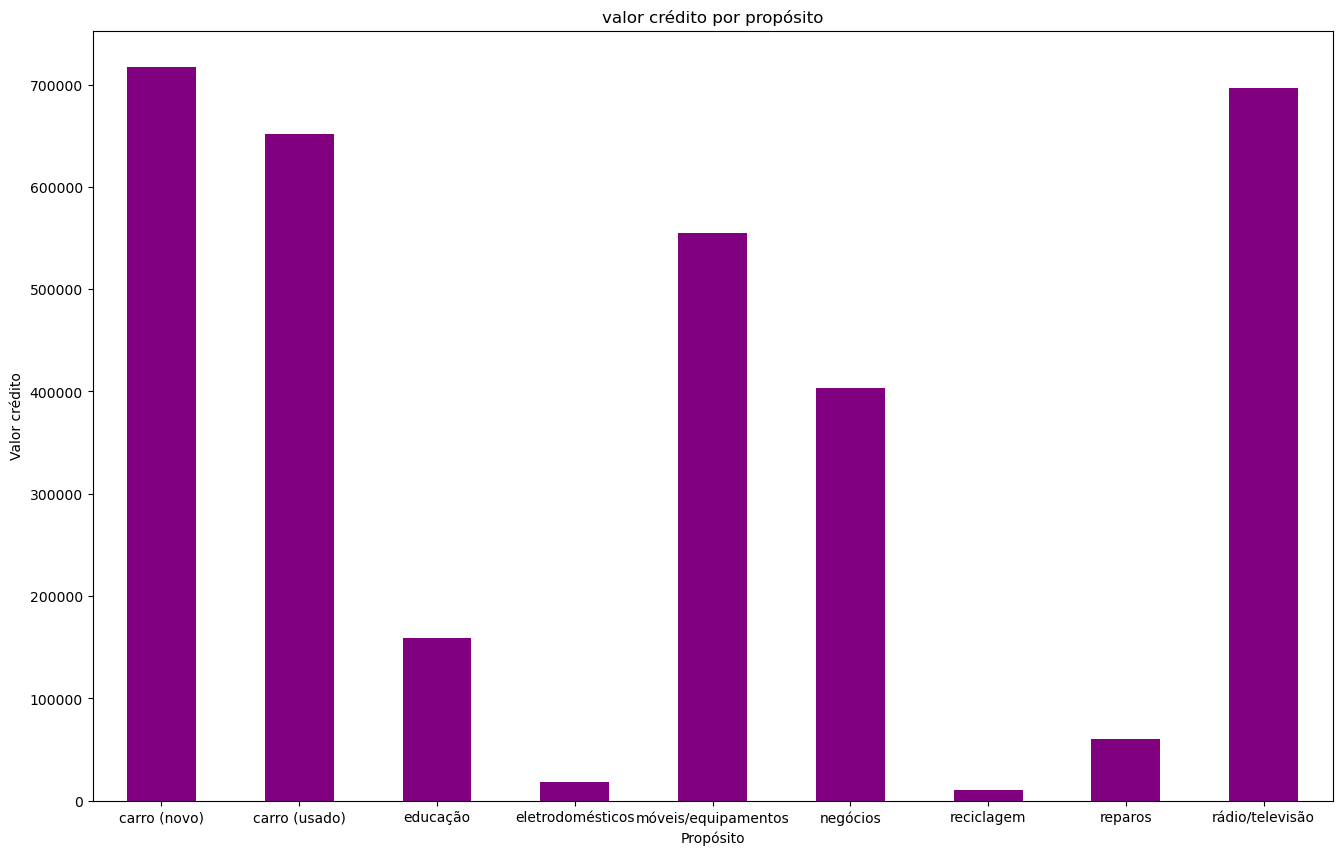

In [12]:
#para o gráfico disso
soma_credito.set_index('Propósito').plot(kind='bar', figsize=(16, 10), color='purple', legend=False)
plt.title('valor crédito por propósito')
plt.xlabel('Propósito')
plt.ylabel('Valor crédito')
plt.xticks(rotation=0)
plt.show()

## 4.2 Análise das variáveis categóricas em relação a solicitação de crédito

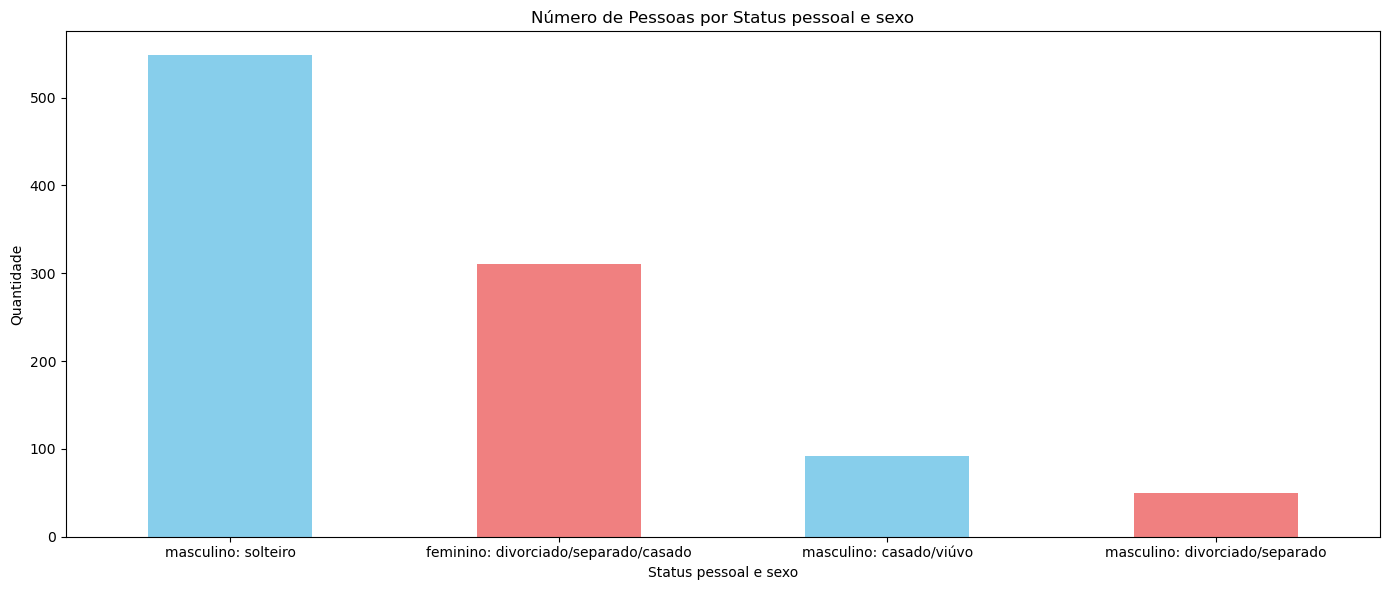

In [13]:
# Contar número de pessoas por sexo
contagem_sexo = arq['Status pessoal e sexo'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(14,6))
contagem_sexo.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Número de Pessoas por Status pessoal e sexo')
plt.xlabel('Status pessoal e sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()#para tirar os valores antes do gráfico

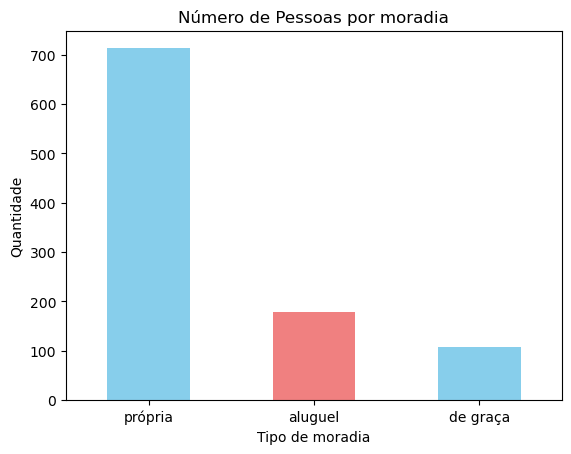

In [14]:
# Analisando o tipo de moradia dos clientes em relação a solicitação de crédito
# Contar número de pessoas por moradia
contagem_moradia = arq['Habitação'].value_counts()

# Plotar gráfico de barras
contagem_moradia.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Número de Pessoas por moradia')
plt.xlabel('Tipo de moradia')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos na horizontal
plt.show()

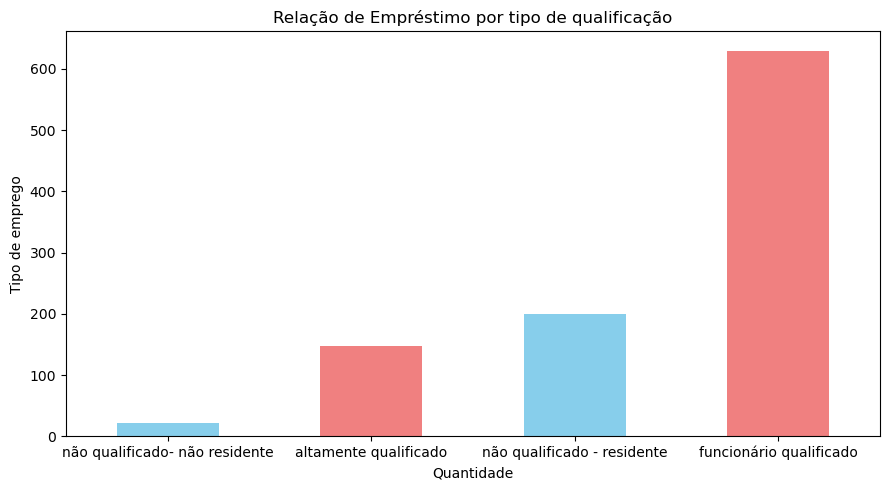

In [15]:
# Analise em relação a qualificação
contagem_empregado = arq['Trabalho'].value_counts()
plt.figure(figsize=(10,6))
ax = contagem_empregado.sort_values().plot(kind='bar',color=['skyblue', 'lightcoral'], figsize=(9,5))
ax.set_title('Relação de Empréstimo por tipo de qualificação')
ax.set_xlabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos na horizontal
ax.set_ylabel('Tipo de emprego')
plt.tight_layout()
plt.show()

## 4.2 Análise explotarória de variáveis numéricas

Para analisarmos nossas variáveis numéricas usaremos oboxplot, esse nos mostra a distribuição daquela variável numérica

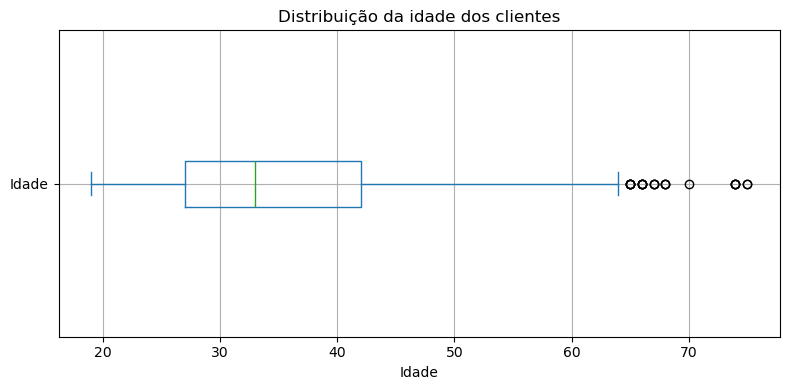

In [16]:
ax = arq['Idade'].plot.box(vert=False, grid=True, whis=1.5, figsize=(8,4))
ax.set_title('Distribuição da idade dos clientes')
ax.set_xlabel('Idade')

plt.tight_layout()
plt.show()

Podemos ver que até temos valores muito alto, mas aqui não consideraremos outliers, pois uma empresa pode ter um cliente com idade maior de 65 anos

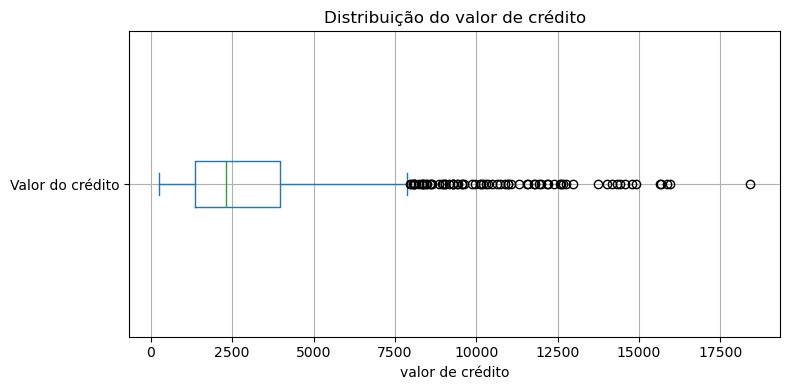

In [17]:
ax = arq['Valor do crédito'].plot.box(vert=False, grid=True, whis=1.5, figsize=(8,4))
ax.set_title('Distribuição do valor de crédito')
ax.set_xlabel('valor de crédito')

plt.tight_layout()
plt.show()

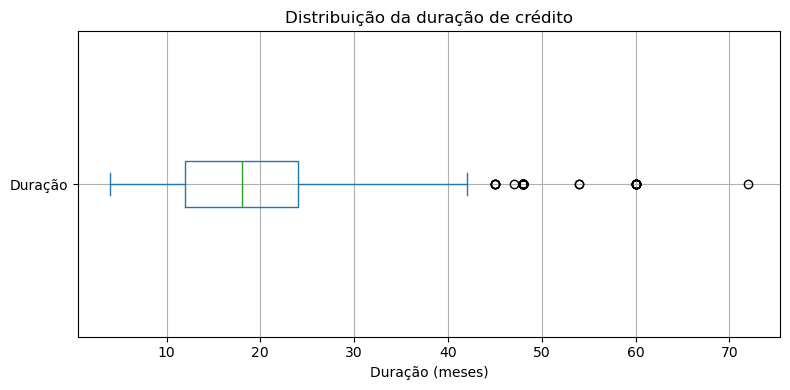

In [18]:
ax = arq['Duração'].plot.box(vert=False, grid=True, whis=1.5, figsize=(8,4))
ax.set_title('Distribuição da duração de crédito')
ax.set_xlabel('Duração (meses)')

plt.tight_layout()
plt.show()

## 4.3 Balanceamento

In [19]:
#Vendo o balanceamento de nossa base
arq['default'].value_counts()

default
1    700
2    300
Name: count, dtype: int64

# 5 Regressão Logistica

In [20]:
#definindo nossa variável resposta
y=arq['default']
y.head(5)

0    1
1    2
2    1
3    1
4    2
Name: default, dtype: int64

In [21]:
#definindo nossa base de modelagem
x=arq.drop(columns='default')
x.head(3)

,Conta corrente,Duração,Histórico de crédito,Propósito,Valor do crédito,Conta poupança,Emprego atual desde,Taxa de parcelamento em porcentagem da renda disponível,Status pessoal e sexo,Outros devedores,Residência atual desde,Propriedade,Idade,Outros planos de parcelamento,Habitação,Número de créditos existentes neste banco,Trabalho,Número de pessoas por fornecer manutenção,Telephone,trabalhador estrangeiro
0,< 0 DM,6,conta crítica/ outros créditos existentes (não...,rádio/televisão,1169,desconhecido/nenhuma conta poupança,.. >= 7 years,4,masculino: solteiro,nenhum,4,imobiliária,67,nenhum,própria,2,funcionário qualificado,1,"sim, registrado em nome do cliente",sim
1,0 <= ... < 200 DM,48,créditos existentes devidamente pagos até agora,rádio/televisão,5951,... < 100 DM,1 <= ... < 4 years,2,feminino: divorciado/separado/casado,nenhum,2,imobiliária,22,nenhum,própria,1,funcionário qualificado,1,nenhum,sim
2,sem conta corrente,12,conta crítica/ outros créditos existentes (não...,educação,2096,... < 100 DM,4 <= ... < 7 years,2,masculino: solteiro,nenhum,3,imobiliária,49,nenhum,própria,1,não qualificado - residente,2,nenhum,sim


## 5.2 Definindo função teste e treino

In [22]:
from sklearn.model_selection import train_test_split
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

#Conferindo as linhas de cada base
base_treino=treino_x.shape[0]
base_teste=teste_x.shape[0]

print('Nossa base de treino tem %s linhas e nossa base de teste tem %s linhas.'%(base_treino, base_teste))

Nossa base de treino tem 700 linhas e nossa base de teste tem 300 linhas.


## Transformação de categorias

In [23]:
# from sklearn.linear_model import LogisticRegression

# modelo=LogisticRegression(max_iter=1000)
# modelo.fit(treino_x, treino_y)

In [24]:
#vemos que o código não conseguiu transformar alumas strings em floats
arq.head()

,Conta corrente,Duração,Histórico de crédito,Propósito,Valor do crédito,Conta poupança,Emprego atual desde,Taxa de parcelamento em porcentagem da renda disponível,Status pessoal e sexo,Outros devedores,...,Propriedade,Idade,Outros planos de parcelamento,Habitação,Número de créditos existentes neste banco,Trabalho,Número de pessoas por fornecer manutenção,Telephone,trabalhador estrangeiro,default
0,< 0 DM,6,conta crítica/ outros créditos existentes (não...,rádio/televisão,1169,desconhecido/nenhuma conta poupança,.. >= 7 years,4,masculino: solteiro,nenhum,...,imobiliária,67,nenhum,própria,2,funcionário qualificado,1,"sim, registrado em nome do cliente",sim,1
1,0 <= ... < 200 DM,48,créditos existentes devidamente pagos até agora,rádio/televisão,5951,... < 100 DM,1 <= ... < 4 years,2,feminino: divorciado/separado/casado,nenhum,...,imobiliária,22,nenhum,própria,1,funcionário qualificado,1,nenhum,sim,2
2,sem conta corrente,12,conta crítica/ outros créditos existentes (não...,educação,2096,... < 100 DM,4 <= ... < 7 years,2,masculino: solteiro,nenhum,...,imobiliária,49,nenhum,própria,1,não qualificado - residente,2,nenhum,sim,1
3,< 0 DM,42,créditos existentes devidamente pagos até agora,móveis/equipamentos,7882,... < 100 DM,4 <= ... < 7 years,2,masculino: solteiro,fiadora,...,acordo de poupança para sociedade de crédito i...,45,nenhum,de graça,1,funcionário qualificado,2,nenhum,sim,1
4,< 0 DM,24,atraso no pagamento no passado,carro (novo),4870,... < 100 DM,1 <= ... < 4 years,3,masculino: solteiro,nenhum,...,desconhecido/sem propriedade,53,nenhum,de graça,2,funcionário qualificado,2,nenhum,sim,2


In [25]:
arq['Conta corrente'].unique()

array(['< 0 DM', '0 <= ... <  200 DM', 'sem conta corrente',
       '... >= 200 DM'], dtype=object)

In [26]:
#Passando esses valores para numeros
a={'< 0 DM':1,
   '0 <= ... <  200 DM':2,
   'sem conta corrente':3,
   '... >= 200 DM':4}
arq['Conta corrente']=arq['Conta corrente'].map(a)

b={'conta crítica/ outros créditos existentes (não neste banco)':1,
   'créditos existentes devidamente pagos até agora':2,
   'atraso no pagamento no passado':3,
   'nenhum crédito utilizado/ todos os créditos foram devidamente pagos':4,
   'todos os créditos neste banco foram devidamente pagos':5
  }
arq['Histórico de crédito']=arq['Histórico de crédito'].map(b)

c={'rádio/televisão':1,
   'educação':2,
   'móveis/equipamentos':3,
   'carro (novo)':4,
   'carro (usado)':5,
   'negócios':6,
   'eletrodomésticos':7,
   'reparos':8,
   'reciclagem':9
  }
arq['Propósito']=arq['Propósito'].map(c)

d={'desconhecido/nenhuma conta poupança':1,
   '... <  100 DM':2,
   '500 <= ... < 1000 DM':3,
   '.. >= 1000 DM':4,
   '100 <= ... <  500 DM':5
  }
arq['Conta poupança']=arq['Conta poupança'].map(d)

e={'.. >= 7 years':1,
   '1  <= ... < 4 years':2,
   '4  <= ... < 7 years':3,
   'desempregado':4,
   '... < 1 year':5
  }
arq['Emprego atual desde']=arq['Emprego atual desde'].map(e)

f={'masculino: solteiro':1,
   'feminino: divorciado/separado/casado':2,
   'masculino: divorciado/separado':3,
   'masculino: casado/viúvo':4
  }
arq['Status pessoal e sexo']=arq['Status pessoal e sexo'].map(f)

g={'nenhum':1,
   'fiadora':2,
   'co-requerente':3
  }
arq['Outros devedores']=arq['Outros devedores'].map(g)

h={'imobiliária':1,
   'acordo de poupança para sociedade de crédito imobiliário/ seguro de vida':2,
   'desconhecido/sem propriedade':3,
   'carro ou outro, não no atributo':4
  }
arq['Propriedade']=arq['Propriedade'].map(h)

i={'nenhum':1,
   'banco':2,
   'lojas':3,
   'carro ou outro, não no atributo':4
  }
arq['Outros planos de parcelamento']=arq['Outros planos de parcelamento'].map(i)

j={'própria':1,
   'de graça':2,
   'aluguel':3
  }
arq['Habitação']=arq['Habitação'].map(j)

k={'funcionário qualificado':1,
   'não qualificado - residente':2,
   'altamente qualificado':3,
   'não qualificado- não residente':4
  }
arq['Trabalho']=arq['Trabalho'].map(k)

i={'sim, registrado em nome do cliente':1,
   'nenhum':2
  }
arq['Telephone']=arq['Telephone'].map(i)

j={'sim':1,
   'não':2
  }
arq['trabalhador estrangeiro']=arq['trabalhador estrangeiro'].map(j)

arq.head()

,Conta corrente,Duração,Histórico de crédito,Propósito,Valor do crédito,Conta poupança,Emprego atual desde,Taxa de parcelamento em porcentagem da renda disponível,Status pessoal e sexo,Outros devedores,...,Propriedade,Idade,Outros planos de parcelamento,Habitação,Número de créditos existentes neste banco,Trabalho,Número de pessoas por fornecer manutenção,Telephone,trabalhador estrangeiro,default
0,1,6,1,1,1169,1,1,4,1,1,...,1,67,1,1,2,1,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,...,1,22,1,1,1,1,1,2,1,2
2,3,12,1,2,2096,2,3,2,1,1,...,1,49,1,1,1,2,2,2,1,1
3,1,42,2,3,7882,2,3,2,1,2,...,2,45,1,2,1,1,2,2,1,1
4,1,24,3,4,4870,2,2,3,1,1,...,3,53,1,2,2,1,2,2,1,2


In [27]:
y=arq['default']
x=arq.drop(columns='default')

# 6.Métricas estátisticas

In [28]:
#Criando nossa base apenas com valores númericos
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

#Conferindo as linhas de cada base
base_treino=treino_x.shape[0]
base_teste=teste_x.shape[0]

print('Nossa base de treino tem %s linhas e nossa base de teste tem %s linhas.'%(base_treino, base_teste))

Nossa base de treino tem 700 linhas e nossa base de teste tem 300 linhas.


## 6.1 Encontrando nossa Acurácia

In [29]:
#Realizando nossa regressão Logistica para encontrarmos nossa Acurácia para pontos de treino
from sklearn.linear_model import LogisticRegression

modelo=LogisticRegression(max_iter=10000)
modelo.fit(treino_x, treino_y)
print("Nossa acurácia será de:",modelo.score(treino_x,treino_y))

Nossa acurácia será de: 0.7585714285714286


In [30]:
#Encontrando nossa acurácia para pontos de teste
previsao=modelo.predict(teste_x)
previsao

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1], d

In [31]:
from sklearn.metrics import accuracy_score

acuracia=accuracy_score(teste_y,previsao)
acuracia

0.7566666666666667

## 6.2 Montando nossa matriz de confusão

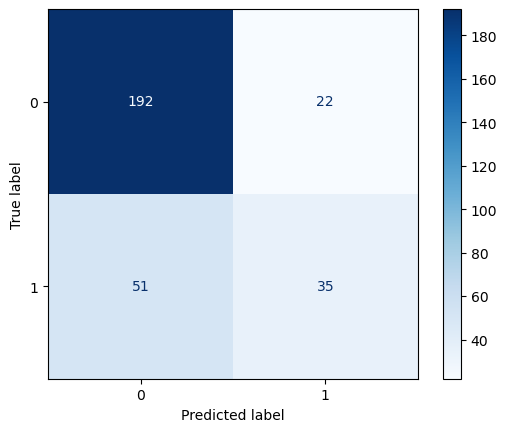

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Criando matrix
matriz = confusion_matrix(teste_y,previsao)

# Criando o display e plotando
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot(cmap='Blues', values_format='.4g')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(teste_y,previsao))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84       214
           2       0.61      0.41      0.49        86

    accuracy                           0.76       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300



## 6.3 Plotando a curva ROC

In [34]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

roc_auc 0.7539121930015213


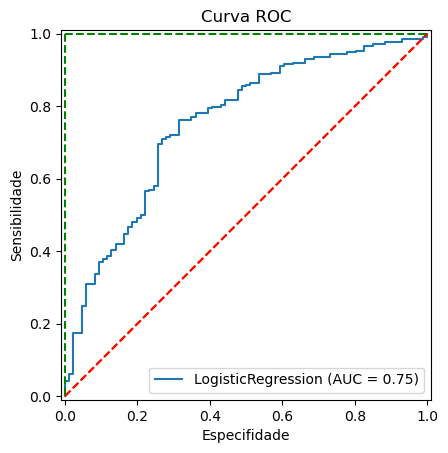

In [35]:
prob_previsao=modelo.predict_proba(teste_x)[:,1]
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

RocCurveDisplay.from_estimator(modelo, teste_x, teste_y, pos_label=1)
plt.plot([0, 1], [0, 1], '--')  # diagonal aleatória
plt.title("Curva ROC")
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()